<a href="https://colab.research.google.com/github/u1353279/Feature-Selection/blob/master/removing_multicolinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [38]:
df=pd.read_csv('/content/drive/My Drive/santandar.csv/train.csv',nrows=20000)

In [39]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


As we are using RF we dont need to bring all values to the same scale

In [40]:
X=df.drop('TARGET',axis=1)
y=df['TARGET']

In [41]:
X.shape,y.shape

((20000, 370), (20000,))

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

Constant features reMoval

In [43]:
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [44]:
constant_filter.get_support().sum()

291

291 features after removing constant features.
to get the list of constant features we need to invert the above code, BeloW

In [45]:
constant_list=[not temp for temp in constant_filter.get_support()]

In [46]:
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [47]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

we will create new variables for the train and test without the constant features. notice we only applied the constant filter to the training dataset and then transfomed noth training and test in order to avoid overfitting

In [48]:
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [49]:
X_train_filter.shape,X_test_filter.shape

((16000, 291), (4000, 291))

Removal of Quasi Constant features

In [50]:
quasi_constant_filter=VarianceThreshold(threshold=0.01)

In [51]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [52]:
quasi_constant_filter.get_support().sum()

245

In [53]:
291-245

46

there are 46 quasi constant features

In [54]:
X_train_quasi_filter=quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter=quasi_constant_filter.transform(X_test_filter)

In [55]:
X_train_quasi_filter.shape,X_test_quasi_filter.shape

((16000, 245), (4000, 245))

ReMoving dulpicate features

to handle duplicates we will need to traspose the dataset so the columns become rows

In [56]:
X_train_T=X_train_quasi_filter.T
X_test_T=X_test_quasi_filter.T

In [57]:
type(X_train_T)

numpy.ndarray

In [58]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [59]:
X_train_T.shape,X_test_T.shape

((245, 16000), (245, 4000))

In [60]:
X_train_T.duplicated().sum()

18

In [61]:
duplicated_features=X_train_T.duplicated()

In [62]:
features_to_keep=[not index for index in duplicated_features]

In [63]:
X_train_unique=X_train_T[features_to_keep].T
X_test_unique=X_test_T[features_to_keep].T

In [64]:
X_train_unique.shape,X_train.shape

((16000, 227), (16000, 370))

In [65]:
# we have gone down from 370 to 227

Let bulid a model on original and reduced features to compare performance

In [66]:
def run_random_forest(X_train,X_test,y_train,y_test):
  clf=RandomForestClassifier(n_estimators=100,random_state=0)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print('AccUracy on test set: ')
  print(accuracy_score(y_test,y_pred))

In [67]:
%%time
run_random_forest(X_train_unique,X_test_unique,y_train,y_test)

AccUracy on test set: 
0.95875
CPU times: user 4.15 s, sys: 7.66 ms, total: 4.16 s
Wall time: 4.19 s


In [68]:
%%time
run_random_forest(X_train,X_test,y_train,y_test)

AccUracy on test set: 
0.9585
CPU times: user 4.82 s, sys: 3.73 ms, total: 4.83 s
Wall time: 4.85 s


In [69]:
#there is a minor change in accuracy however the time performance has improved the training time by reducing the complexitty

In [70]:
(4.52-3.99)*100/4.52

11.725663716814147

In [71]:
# we have a gain of 11.7% in training time

Removing Correlated Features as after an optimum number of features the performance will start to decrease and teh computational time will increase

In [72]:
# calculate the pearson correlation
corrmat=X_train_unique.corr()

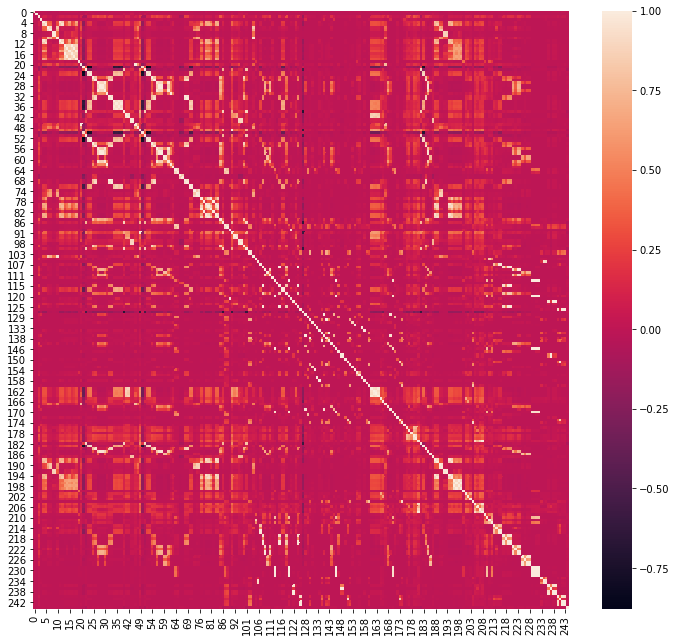

In [76]:
plt.figure(figsize=(12,11))
sns.heatmap(corrmat)

In [77]:
# select all correlated features with a correlation over 0.8 

In [78]:
def get_correlation(data,threshold):
  corr_col=set()
  corrmat=data.corr()
  for i in range(len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j])>threshold:
        colname=corrmat.columns[i]
        corr_col.add(colname)
  return corr_col

In [79]:
corr_features=get_correlation(X_train_unique,0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [80]:
# now we can remove these features

In [81]:
len(corr_features)

124

In [82]:
X_train_uncorr=X_train_unique.drop(labels=corr_features,axis=1)
X_test_uncorr=X_test_unique.drop(labels=corr_features,axis=1)

In [83]:
X_train_uncorr.shape,X_test_uncorr.shape

((16000, 103), (4000, 103))

We have reduced down to 103 features after removing constant/quasi, duplicates and correlated features

In [84]:
%%time
run_random_forest(X_train_uncorr,X_test_uncorr,y_train,y_test)

AccUracy on test set: 
0.95875
CPU times: user 3.02 s, sys: 14.3 ms, total: 3.04 s
Wall time: 3.06 s


In [85]:
%%time
run_random_forest(X_train,X_test,y_train,y_test)

AccUracy on test set: 
0.9585
CPU times: user 4.96 s, sys: 4.75 ms, total: 4.96 s
Wall time: 4.99 s


In [86]:
(4.99-3.06)*100/4.99

38.67735470941884

We have reduced the training time by a gain of 38.68%.